# **Text Wrangling**

Text wrangling or text preprocessing is a crucial first phase of the AI/NLP lifecycle that has a significant impact on the quality of downstream AI and NLP applications and outcomes. This notebook aims to develop technical skills in the primary text wrangling techniques. 

<img src="http://drive.google.com/uc?export=view&id=1FoU-zF-sXsTViikws6zDg_49mFZlLgml" />


Not all wrangling techniques are required in every use case or application, which is another reason to develop a sound understanding of each technique so you know what's relevant or not. 

e.g. removing emojis degrades the quality of emotional expressions in the text corpus. 



## **Load the dataset**

We will be using a [customer support dataset from Twitter](https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter), which contains customer support tweets and responses from organisations such as Apple, Amazon, Uber etc.

We have uploaded this dataset to a shared location, and the following code block will load this into your google drive. You will need to log into your google drive to authenticate and allow this access.

In [ ]:
#installing libraries to get access to the data files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#authenticate with google drive credentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# This is the file ID of the dataset, this will download the datafile from the shared location
dataset_id = '1yLfFuf0IPO3XF12GPy9mFrEUSzjzPcoh'
Customer_support_data = drive.CreateFile({'id':dataset_id})
Customer_support_data.GetContentFile('Customer_support_data.csv')

## **Create a Pandas DataFrame**

Pandas is the benchmark data analysis library in Python for tasks such as, 
*   Data cleaning, filling, normalizing
*   Merging datatables
*   Data visualization
*   Statistical analysis
*   Loading and saving data and much more...

Let's use pandas to create a dataframe from the CSV file.


In [ ]:
import pandas as pd

#read the datafile using python pandas. 
dataset = pd.read_csv(r"Customer_support_data.csv", usecols = ['created_at', 'text'])

Let's see what the dataset looks like. You can click on the pencil icon top right corner to expand the data table in interactive mode.

In [ ]:
display(dataset)

,created_at,text
0,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...
1,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that
2,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...
3,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...
4,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.
...,...,...
4995,Thu Nov 02 15:29:37 +0000 2017,"@117290 Hm, they should definitely resume if a..."
4996,Thu Nov 02 15:31:46 +0000 2017,"@117290 That's where they need to be on, so ch..."
4997,Mon Oct 30 02:13:57 +0000 2017,@115940 Can you guys maybe like....FIX your st...
4998,Tue Oct 31 23:40:03 +0000 2017,@117291 Hulu is only available in the U.S. rig...


## **Preprocessing tasks**

Now let's work through the following preprocessing tasks: 

1.   Change to lowercase
2.   Remove punctuations
3.   Remove numbers
4.   Remove stopwords
5.   Remove whitespaces
6.   Preprocess emojis
7.   Fix contractions
8.   Spell check
9.   Tokenization
10.  Stemming
11.  Lemmatization
12.  Vectorisation






## **Change to lowercase**
 
 Generally in text wrangling, all text is converted to lowercase, primarily for consistency, as well as the accuracy of tasks such as word frequency analysis and word matching.

 e.g. convert ‘DATA’, ’Data’, ‘DaTa’ and ‘DATa’ into ‘data’.

### **Demonstration**

In [ ]:
text = "We can change between UPPERCASE and lowercase"
text_lowered = text.lower()

print(text_lowered)

we can change between uppercase and lowercase


In [ ]:
text = "We can change between UPPERCASE and lowercase"
text_uppered = text.upper()

print(text_uppered)

WE CAN CHANGE BETWEEN UPPERCASE AND LOWERCASE


### **Convert the entire dataset to lowercase**

We can access columns of the dataframe with **Dataframe[Column]** command and then create a new columns "text_lower". 

In [ ]:
dataset["text_lower"] = dataset["text"].str.lower()
display(dataset)

,created_at,text,text_lower
0,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,@sprintcare i did.
...,...,...,...
4995,Thu Nov 02 15:29:37 +0000 2017,"@117290 Hm, they should definitely resume if a...","@117290 hm, they should definitely resume if a..."
4996,Thu Nov 02 15:31:46 +0000 2017,"@117290 That's where they need to be on, so ch...","@117290 that's where they need to be on, so ch..."
4997,Mon Oct 30 02:13:57 +0000 2017,@115940 Can you guys maybe like....FIX your st...,@115940 can you guys maybe like....fix your st...
4998,Tue Oct 31 23:40:03 +0000 2017,@117291 Hulu is only available in the U.S. rig...,@117291 hulu is only available in the u.s. rig...


## **Removing punctuation**
Another common wrangling task, which ensures consistency of the text corpus and its words. 

e.g.  "Words.", "Words!", "Words," should be converted to "Words"


### **Removing punctuation by iterating through text**


Punctuations are defined in the String package of python.

In [ ]:
import string
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Use the replace function in python to replace all the occurrences of punctuation characters. 

text_new = text.replace(oldvalue, newvalue)

The replace function will find all occurrences of given string in a text and replace it with replacement string.

In [ ]:
text = "I like Java"
print(text.replace("Java", "Python"))

text = "I like punctuation!"
print(text.replace("!", ""))




I like Python
I like punctuation


This is obviously tedious, instead we could write a function to remove all punctuation as shown below. 

In [ ]:
#iterating through all punctuation and remove them
def remove_punctuation(text):
  for each_punctuation in punctuations:
      text = text.replace(each_punctuation, '')
  return text


In [ ]:
text = 'I like pu&n^c*tu@a#t$i%o^n!'

remove_punctuation(text)

'I like punctuation'

### **Removing punctuation using regex**

We can also use RegEx (regular expressions) to remove punctuation.

RegEx are a pattern-matching method commonly found in most string operation packages. In Python, we use the following single line of code to access the substitution function in the "Re" package.


result = re.sub(pattern, replacement, input string)

In [ ]:
import re

text = '!wh?at is the w_eat[h]er lik?e.'
#replace punctuation with an empty string
text_new = re.sub("[!#$%&'()*+,-./:;<=>?@[\]^_`{|}~]",'',text)
print(text_new)


what is the weather like


Writing the function much shorter way.

In [ ]:
def remove_punctuation(text):
  return re.sub("[!#$%&'()*+,-./:;<=>?@[\]^_`{|}~]",'',text)

### **Removing punctuation in the dataset**

With pandas, we use the apply() function to process all the values of a given column.


Dataframe['New column'] = Dataframe['Column'].apply(Function)

In [ ]:
dataset["text_without_punctuations"] = dataset["text_lower"].apply(remove_punctuation)
display(dataset[['text', 'text_without_punctuations']])

,text,text_without_punctuations
0,@115712 I understand. I would like to assist y...,115712 i understand i would like to assist you...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,115712 please send us a private message so tha...
4,@sprintcare I did.,sprintcare i did
...,...,...
4995,"@117290 Hm, they should definitely resume if a...",117290 hm they should definitely resume if alr...
4996,"@117290 That's where they need to be on, so ch...",117290 thats where they need to be on so check...
4997,@115940 Can you guys maybe like....FIX your st...,115940 can you guys maybe likefix your stuff f...
4998,@117291 Hulu is only available in the U.S. rig...,117291 hulu is only available in the us right ...


## **Removing numbers.**

In some cases, we need to remove numbers from the text as they do not contain any relevant information. For example, if we want to extract sentiment from text, numbers do not add value, instead it can reduce the accuracy of the sentiment extraction.

### **Removing numbers by iterating through text**

In [ ]:
#iterating through all digits and remove them
import string

text = '1223 Hello, how are you doing?.'

digits = string.digits #[0-9] 

for each_digit in digits:
    text = text.replace(each_digit, '')
print(text)

 Hello, how are you doing?.


### **Removing numbers using regex**

We can simply use regex for this.

In regex notation we use \d for digits.

In [ ]:
# Using regex
text = '1223 Hello, how are you doing?.'
text_new = re.sub('\d', '', text)
print(text_new)

 Hello, how are you doing?.


We can quickly write a function for this.

In [ ]:
def remove_numbers(text):
  return re.sub('\d', '', text)

### **Removing numbers in the dataset**

In [ ]:
dataset["text_without_numbers"] = dataset["text_without_punctuations"].apply(remove_numbers)
display(dataset[['text', 'text_without_numbers']])

,text,text_without_numbers
0,@115712 I understand. I would like to assist y...,i understand i would like to assist you we wo...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,please send us a private message so that we c...
4,@sprintcare I did.,sprintcare i did
...,...,...
4995,"@117290 Hm, they should definitely resume if a...",hm they should definitely resume if already e...
4996,"@117290 That's where they need to be on, so ch...",thats where they need to be on so check there...
4997,@115940 Can you guys maybe like....FIX your st...,can you guys maybe likefix your stuff for the...
4998,@117291 Hulu is only available in the U.S. rig...,hulu is only available in the us right now bu...


## **Removing Stopwords**


Stopwords are the most common words in any language. Usually stopwords contain articles, prepositions, pronouns, conjunctions, etc. In most NLP methods, stopwords are removed as these words do not contain semantics and may have a negative impact on downstream techniques like frequency analysis.

It also makes the dataset smaller which improves performance.
e.g. “It is a good outcome.” -> "good outcome"

Here we use the NLTK library to remove stopwords.

In [ ]:
# import the NLTK library
import nltk

# Download stopwords to the nltk library 
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# get the list of all stopwords from the library
stopword_list = stopwords.words('english')

In [ ]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### **Updating the stopword list**

Sometimes we need to modify the stopwords list to fit our task.

The term 'not' is in the stop word list, but it has a specific use in negation (i.e. happy vs not happy)
e.g.  “The product was not good.” will be misclassified as positive sentiment if we remove 'not'. 
Also, there can be some words we need to add to the stopwords list depending on the use case.

So let's remove 'not' from the list of stopwords. 

In [ ]:
stopword_list.remove('not')
stopword_list.append('newWord')

In [ ]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

### **Removing stopwords iterating through words of the text**

Here we want to check whether words in the given text belong to the stopwords list and then remove those. So first we need to split our text into words. For that we use text.split() function.

A quick demo first.

In [ ]:
text = "the classroom is empty right now"
#split text into words.
tokens = text.split()
print(tokens)

['the', 'classroom', 'is', 'empty', 'right', 'now']


Check and remove stopwords

In [ ]:
#iterate through tokens and remove any stopwords
stop_removed_tokens = [t for t in tokens if t not in stopword_list]
print(stop_removed_tokens)

['classroom', 'empty', 'right']


Use the join function to string the words together.

(connector).join(list of words)

In [ ]:
# Combine tokens back with spaces between
convert_to_string = (" ").join(stop_removed_tokens)
print(convert_to_string)

classroom empty right


A function makes our code efficient and repeatable, let's create a function:

In [ ]:
def remove_stop_words(text):
  tokens = text.split()
  stop_removed_tokens = [t for t in tokens if t not in stopword_list]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

In [ ]:
remove_stop_words("It is a good product.")

'It good product.'

### **Removing stopwords in the dataset**

In [ ]:
dataset["text_without_stopwords"] = dataset["text_without_numbers"].apply(remove_stop_words)
display(dataset[['text', 'text_without_stopwords']])

,text,text_without_stopwords
0,@115712 I understand. I would like to assist y...,understand would like assist would need get pr...
1,@sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,please send us private message assist click me...
4,@sprintcare I did.,sprintcare
...,...,...
4995,"@117290 Hm, they should definitely resume if a...",hm definitely resume already enabled disappear...
4996,"@117290 That's where they need to be on, so ch...",thats need check home screengtsettingsgtcaptio...
4997,@115940 Can you guys maybe like....FIX your st...,guys maybe likefix stuff longest time captions...
4998,@117291 Hulu is only available in the U.S. rig...,hulu available us right well sure share intere...


## **Removing whitespace**

There can be extra whitespaces (space and tab characters) in the text, specifically after the above preprocessing steps such as removing numbers and stopwords.
These should be removed for consistency and process/memory efficiency. 

In [ ]:
text = "The orders 31144, 22111, and 31235 contained faulty products"
#removing punctuations
text = re.sub(r"[^\w\s]",'',text)
#removing digits
text = re.sub('\d+', '', text)
print(text)

The orders   and  contained faulty products


We use regex to remove extra whitespaces. In regex notation we use \s for spaces between words. Here the logic is any single space followed by one or more additional spaces should be removed.

### **Removing extra whitespaces using regex.**

In [ ]:
spaces_removed_text = re.sub(r"\s+", " ", str(text))
print(spaces_removed_text)

The orders and contained faulty products


### **Removing extra whitespaces using split and join.**

In [ ]:
# Without regex but much faster 
spaces_removed_text = (' ').join(text.split())
print(spaces_removed_text)


The orders and contained faulty products


## **Removing emojis.**

Emojis are used extensively in text. Depending on the use case, we have to remove or convert emojis to text. 

Working with emojis is not straightforward as we have to work with Unicode. Instead of Unicode, let's use the Python emoji package, which provides function calls for working with emojis.



In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=e1c32880cffea4f966ef5eaaef4d916b231d13105214bdceb75d5e5cb512b88a
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [ ]:
import emoji

#provide string with emojis
text = "This sample text contains laughing emojis 😀 😃 😄 😁 😆 😅 😂 🤣"

#print text after removing the emojis from it
print(emoji.replace_emoji(text, replace=""))

This sample text contains laughing emojis        


### **Replacing emojis with words.**

Instead of removing, we can preserve the informational value of emojis by converting them to their text representation, using the demojize() function.


In [ ]:
text = "Python is 👍 😀"
text = emoji.demojize(text)

print(text)

Python is :thumbs_up: :grinning_face:


**What else should we do here?**

## **Fixing contractions**

Contractions combine two or more words to form a shortened version of the text. We must expand contractions to preserve semantics.

When we use steps such as punctuation removal, contractions can lose their meaning. In such cases, we have to fix contractions prior to punctuation removal. e.g. you're -> youre cannot be used for fixing contractions.

Let's use the Python contractions library.

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import contractions
text = "We'd like to know what are the new features you're planning to release in the new version!"
contractions.fix(text)


'We would like to know what are the new features you are planning to release in new version!'

**What would be the result if we did this after the removal of punctuation?** 

## **Spell check**



### **Method 1 - Textblob spell checker**

Here wie usee the txtbllob pckge for speill chcek. 

In [ ]:
!pip install textblob
#installing libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

sentence = TextBlob('Here wie usee the txtbllob pckge for speill chcek.')

result = sentence.correct()
print(result)

Were wie see the txtbllob page for spell cheek.


### **Method 2 - Spacy contextualSpellCheck spell checker**

The Spacy contextualSpellCheck takes into account "context" of all the terms when resolving spelling errors. Let's see if it works. 

In [ ]:
!pip install contextualSpellCheck
import spacy
import contextualSpellCheck

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nlp = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp)
doc = nlp('Here wie usee the txtbllob pckge for speill chcek.')

print(doc._.outcome_spellCheck)

Here we me the littlek for theie.


In [ ]:
nlp = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp)



doc = nlp('I wnt to be a data scientist')
print(doc._.outcome_spellCheck)

doc = nlp('I wnt to the university yesterday')
print(doc._.outcome_spellCheck)

I want to be a data scientist
I went to the university yesterday


### **Method 3 - pyspellchecker**

The pyspellchecker follows a more practical approach of shared decision-making with a human expert.

In [ ]:
!pip install pyspellchecker

from spellchecker import SpellChecker

spell = SpellChecker()

# find words that may be misspelled
misspelled = spell.unknown(("Here wie usee the txtbllob pckge for speill chcek.").split())

for word in misspelled:
    print("1) misspelled word:",word, end='; ')
    # `most likely` answer
    print("2) most likely word:", spell.correction(word), end='; ')
    # list of `likely` options
    print("3) list of likely words:", spell.candidates(word))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 6.6 MB/s 
1) misspelled word: usee; 2) most likely word: see; 3) list of likely words: {'unsee', 'see', 'lsee', 'uses', 'use', 'used', 'user'}
1) misspelled word: speill; 2) most likely word: spell; 3) list of likely words: {'spell', 'spill'}
1) misspelled word: txtbllob; 2) most likely word: None; 3) list of likely words: None
1) misspelled word: chcek.; 2) most likely word: check; 3) list of likely words: {'cheek', 'cheeks', 'cheeky', 'checks', 'check'}
1) misspelled word: pckge; 2) most likely word: page; 3) list of likely words: {'pudge', 'pickle', 'cage', 'poke', 'pekoe', 'paige', 'page', 'pike', 'phage', 'pocke', 'package', 'purge', 'puke'}


## **Tokenization**

Tokenization is the process of splitting a given text into constituent sentences and words. 

In [ ]:
nltk.download('punkt') #download punkt within nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Paragraphs to sentences**


In [ ]:
from nltk.tokenize import sent_tokenize
# e.g., SpaceX wiki https://en.wikipedia.org/wiki/SpaceX

# """Space Exploration Technologies is an American aerospace manufacturer, 
# a provider of space transportation services, and a communications corporation 
# headquartered in Hawthorne, California. SpaceX was founded in 2002 by Elon Musk 
# with the goal of reducing space transportation costs to enable the colonization 
# of Mars. SpaceX manufactures the Falcon 9 and Falcon Heavy launch vehicles, 
# several rocket engines, Cargo Dragon, crew spacecraft, and Starlink communications 
# satellites."""

text = """Space Exploration Technologies is an American aerospace manufacturer, a provider of space transportation services, and a communications corporation headquartered in Hawthorne, California. SpaceX was founded in 2002 by Elon Musk with the goal of reducing space transportation costs to enable the colonization of Mars. SpaceX manufactures the Falcon 9 and Falcon Heavy launch vehicles, several rocket engines, Cargo Dragon, crew spacecraft, and Starlink communications satellites."""
sentences = sent_tokenize(text)

for sentence in sentences:
  print(sentence)

Space Exploration Technologies is an American aerospace manufacturer, a provider of space transportation services, and a communications corporation headquartered in Hawthorne, California.
SpaceX was founded in 2002 by Elon Musk with the goal of reducing space transportation costs to enable the colonization of Mars.
SpaceX manufactures the Falcon 9 and Falcon Heavy launch vehicles, several rocket engines, Cargo Dragon, crew spacecraft, and Starlink communications satellites.


 ### **Sentences to words**



In [ ]:
from nltk.tokenize import word_tokenize
import nltk
# e.g., SpaceX wiki https://en.wikipedia.org/wiki/SpaceX

# """Space Exploration Technologies is an American aerospace manufacturer, 
# a provider of space transportation services, and a communications corporation 
# headquartered in Hawthorne, California. SpaceX was founded in 2002 by Elon Musk 
# with the goal of reducing space transportation costs to enable the colonization 
# of Mars. SpaceX manufactures the Falcon 9 and Falcon Heavy launch vehicles, 
# several rocket engines, Cargo Dragon, crew spacecraft, and Starlink communications 
# satellites."""

text = """Space Exploration Technologies is an American aerospace manufacturer, a provider of space transportation services, and a communications corporation headquartered in Hawthorne, California. SpaceX was founded in 2002 by Elon Musk with the goal of reducing space transportation costs to enable the colonization of Mars. SpaceX manufactures the Falcon 9 and Falcon Heavy launch vehicles, several rocket engines, Cargo Dragon, crew spacecraft, and Starlink communications satellites."""

word_tokenize(text)

['Space',
 'Exploration',
 'Technologies',
 'is',
 'an',
 'American',
 'aerospace',
 'manufacturer',
 ',',
 'a',
 'provider',
 'of',
 'space',
 'transportation',
 'services',
 ',',
 'and',
 'a',
 'communications',
 'corporation',
 'headquartered',
 'in',
 'Hawthorne',
 ',',
 'California',
 '.',
 'SpaceX',
 'was',
 'founded',
 'in',
 '2002',
 'by',
 'Elon',
 'Musk',
 'with',
 'the',
 'goal',
 'of',
 'reducing',
 'space',
 'transportation',
 'costs',
 'to',
 'enable',
 'the',
 'colonization',
 'of',
 'Mars',
 '.',
 'SpaceX',
 'manufactures',
 'the',
 'Falcon',
 '9',
 'and',
 'Falcon',
 'Heavy',
 'launch',
 'vehicles',
 ',',
 'several',
 'rocket',
 'engines',
 ',',
 'Cargo',
 'Dragon',
 ',',
 'crew',
 'spacecraft',
 ',',
 'and',
 'Starlink',
 'communications',
 'satellites',
 '.']

## **Stemming**

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. This primarily removes the final few characters with "form different" variations of the word.

Stemming should be used with care as it can sometimes be incorrect like stemming "Optus" to "Optu".

Overstemming and understemming can also be a challenge. 

Overstemming occurs when two words are stemmed from the same root that are of different stems (university and universe). 
Understemming is when two or more words are incorrectly reduced to more than one root word (Programmers program)

We use NLTK for this task.

In [ ]:
from nltk.stem import PorterStemmer

def stemming_function(text):
  stemmer = PorterStemmer()
  word_list = text.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

text = "Python programmers across the universe and in universities program with the Python programming language for Optus University"
stemming_function(text)

'python programm across the univers and in univers program with the python program languag for optu univers'

## **Lemmatization**

Lemmatization preserves more meaning than stemming as it accounts for context. This is known as the lemma in morphology, forms of the same lexeme.  

But here we have to specify the POS - Part of speech tag. Ex: verb, noun etc.

e.g. Stemming the word ‘Studies‘ would return ‘Studi‘.
Lemmatizing the word ‘Studies‘ would return ‘Study‘.



In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
 
print("study :", lemmatizer.lemmatize("study", wordnet.VERB))
print("studying :", lemmatizer.lemmatize("studying", wordnet.VERB))
print("studies :", lemmatizer.lemmatize("studies", wordnet.VERB))

study : study
studying : study
studies : study


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
stemmer = PorterStemmer()
print("study :", stemmer.stem("study"))
print("studying :", stemmer.stem("studying"))
print("studies :", stemmer.stem("studies"))

study : studi
studying : studi
studies : studi


In [ ]:
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatization_function(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

text = "She studies Python programming in the library and walks home."
lemmatization_function(text)

'She study Python programming in the library and walk home.'

## **Vectorization**

Vectorisation is the process of converting preprocessed text into numerical vectors (arrays or matrices). As most AI algorithms work on numerical data, all text data must be converted to a suitable numerical representation for the application of such AI algorithms. Many such vectorisation methods are available, ranging from simple to complex,

*  One-hot Encoding (OHE)
*  Bag-of-Words (BOW)
*  Term Frequency-Inverse Document Frequency (TF-IDF)
*  Word Embeddings

Terminology used in vectorisation: 

**Document**
Document is a single text vector, a single tweet or one review posted by a user.

**Corpus**
Corpus is the collection of all text vectors, that is all documents in the dataset

**Vocabulary**
The vocabulary of a corpus contains every unique word.

Let's work through a manual example to understand the terminology and what it represents.

*Document 1*: Python is an interesting programming language.

*Document 2*: We learn Python programming language in this course.

*Corpus* = [["Python is an interesting programming language"], ["We learn Python programming language in this course"]]

*Vocabulary* = [Python, is, an, interesting, programming, language, We, learn, in, this, course]


### **One-hot Encoding (OHE)**

The corpus vocabulary is V, which contains all the unique terms in the given set of documents. Each term t in V is given a unique ID i that is between 1 and V. Each word is represented by a V dimensional binary vector of ‘0’s with a ‘1’ where the index = i. A sentence is then represented using the combination of those binary vectors for each word. 


**Example**                                                                      
Document1: "Python is an interesting programming language." 

Vocabulary = [*Python, is, an, interesting, programming, language, We, learn, in, this, course*]

One-hot encoding: 

Python = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                                       
is = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]                                           
an = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]                                           
interesting = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]                                  
programming = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]                                  
language = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Document1: [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


document_1 = "Python is an interesting programming language."
document_2 = "We learn Python programming language in this course."


documents = [document_1, document_2]
processed_documents = [doc.lower().replace(".","") for doc in documents]

#Build the vocabulary
vocab = {}
count = 0
for document in processed_documents:
    for word in document.split():
        if word not in vocab:
            count = count +1
            vocab[word] = count
print(vocab)

def get_onehot_vector(document):
    onehot_encoded = []
    document = document.lower().replace(".","")
    for word in document.split():
        temp = [0]*len(vocab)
        if word in vocab:
            temp[vocab[word]-1] = 1 # -1 is to take care of the fact indexing in array starts from 0 and not 1
        onehot_encoded.append(temp)
    return onehot_encoded

{'python': 1, 'is': 2, 'an': 3, 'interesting': 4, 'programming': 5, 'language': 6, 'we': 7, 'learn': 8, 'in': 9, 'this': 10, 'course': 11}


In [ ]:
get_onehot_vector(document_1) 

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]

### **Bag-of-Words (BOW)**

Treats the document as a “bag” of words – disregarding the sequence of words and context. The corpus vocabulary is V, which contains all the unique terms in the given set of documents. Each term t in V is given a unique ID i that is between 1 and V. Each document is then converted into a vector of V dimensions where each value at index = i , is the number of times the term t occurs in the document. 



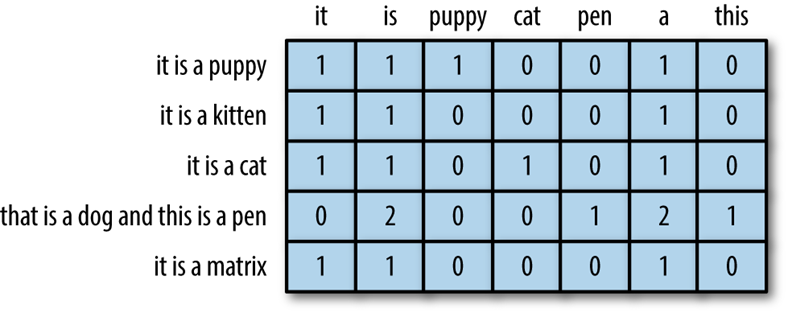

Let's convert our documents to Bag of Words using CountVectorizer in Python. 

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer

document_1 = "Python is an interesting programming language."
document_2 = "We learn Python programming language in this course."

documents = [document_1, document_2]

# Instantiate count vectorizer
countvec = CountVectorizer()
cdf = countvec.fit_transform(documents)
bow = pd.DataFrame(cdf.toarray(), columns = countvec.get_feature_names())
bow

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,an,course,in,interesting,is,language,learn,programming,python,this,we
0,1,0,0,1,1,1,0,1,1,0,0
1,0,1,1,0,0,1,1,1,1,1,1


### **Term Frequency-Inverse Document Frequency (TF-IDF)**

Term frequency–inverse document frequency (TF-IDF) quantifies the importance of a word relative to all others in the corpus. 

TF: "how often does the term occur in a given document"

TF = (count of term t/count of all terms)

IDF: "how important is the term for the entire corpus (is it common or rare)"

IDF =  log-scale (total number of documents in the corpus/ number of documents containing the term)



document_1 = "Python is an interesting programming language."

document_2 = "We learn Python programming language during this course."

|  | an | course| during| interesting| is | language | learn| programming| python | this| we |
|---|---|---|---|---|---|---|---|---|---|---|---|
|Document 1 (TF)|1/6|0/6|0/6|1/6|1/6|1/6|0/6|1/6|1/6|0/6|0/6|
|Document 2 (TF)|0/8|1/8|1/8|0/8|0/8|1/8|1/8|1/8|1/8|1/8|1/8|
|IDF|log(2/1)=0.3|log(2/1) = 0.3|log(2/1)=0.3|log(2/1)=0.3|log(2/1)=0.3|log(2/2)=0|log(1/2)=0.3|log(2/2)=0|log(2/2)=0|log(2/1)=0.3|log(2/1)=0.3|

TF-IDF 

|  | an | course| during| interesting| is | language | learn| programming| python | this| we |
|---|---|---|---|---|---|---|---|---|---|---|---|
|Document 1|0.05|0|0|0.05|0.05|0|0.05|0|0|0|0|
|Document 2|0|0.03|0.03|0|0|0|0.03|0|0|0.03|0.03|




Please note that, sklearn uses a modified TF-IDF with normalization, so the values from sklearn will not be same as the values manually calculated above. See [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#:~:text=The%20formula%20that%20is%20used,document%20frequency%20of%20t%3B%20the).

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

document_1 = "Python is an interesting programming language."
document_2 = "We learn Python programming language during this course."

documents = [document_1, document_2]

def tokenize(text):
  return text.lower().replace(".","").split()

tfidf = TfidfVectorizer(tokenizer=tokenize)
tfs = tfidf.fit_transform(documents)
df_tfidfvect = pd.DataFrame(data = tfs.toarray(), index = ['Document 1','Document 2'],columns = tfidf.get_feature_names_out())
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

                  an    course    during  interesting        is  language  \
Document 1  0.470426  0.000000  0.000000     0.470426  0.470426  0.334712   
Document 2  0.000000  0.391668  0.391668     0.000000  0.000000  0.278675   

               learn  programming    python      this        we  
Document 1  0.000000     0.334712  0.334712  0.000000  0.000000  
Document 2  0.391668     0.278675  0.278675  0.391668  0.391668  


### **Word Embeddings**

Word embeddings are a learned representation of a vocabulary where words are assigned weight vectors based on their contextual meaning, such that similar words have a similar weights. 

Word embeddings group vectors of similar words together in vector space, by creating vectors that are distributed numerical representations.


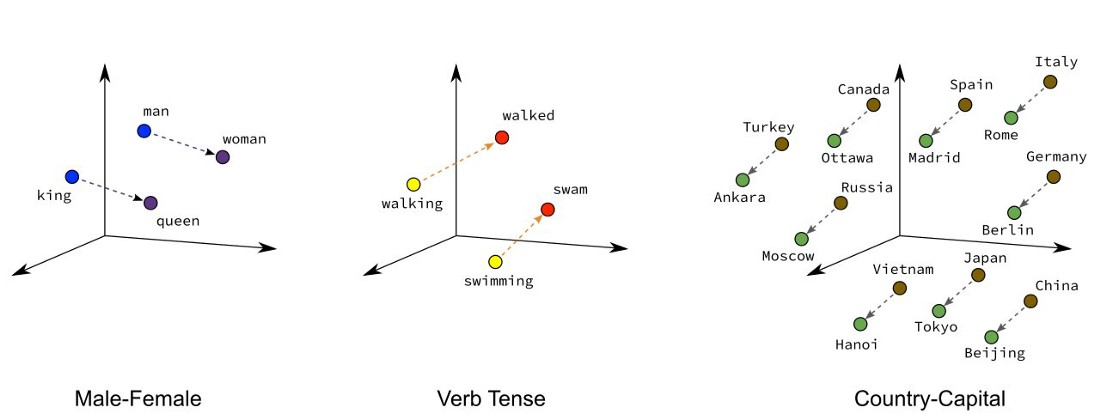

#### **Word2Vec** 

The Word2vec algorithm uses a neural network approach to learn a word embedding from a text corpus. It has two main learning methods, continuous bag of words (CBOW) and skip grams, both of which learn from a window of words for each target word to provide context and in turn meaning for words. 

Gensim provides the Word2Vec class for a Word2Vec model learned off tweets.

In [ ]:
import gensim.downloader as api
model_glove_twitter = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


Retrieve the word embedding (or weight vector) of a given word:

In [ ]:
model_glove_twitter['cool']

array([-0.65575 ,  0.45659 , -0.16748 , -0.58345 , -0.23073 , -0.78348 ,
       -0.23166 , -0.022452, -0.57968 ,  0.526   , -0.2214  ,  0.17614 ,
        0.46513 ,  0.79142 ,  0.017403,  1.0879  ,  0.24418 ,  0.27523 ,
       -0.26452 , -1.0389  ,  0.014045,  0.68459 ,  0.98151 ,  0.21561 ,
        0.36278 , -0.51819 , -0.40552 ,  1.349   ,  1.5399  ,  0.60541 ,
        2.6604  ,  0.074535, -0.076292,  0.12501 , -0.026268,  0.16843 ,
       -0.41844 ,  0.44505 ,  0.25033 , -1.1557  ,  0.24575 ,  0.41847 ,
       -0.10633 , -0.28433 ,  0.51215 ,  0.51371 ,  0.53004 , -0.889   ,
        0.054744,  0.78793 ], dtype=float32)

Since word embedding captures contextual similarities, let's find similar words:

In [ ]:
model_glove_twitter.most_similar('cool')

[('hot', 0.860502302646637),
 ('warm', 0.8107472658157349),
 ('cold', 0.8103548884391785),
 ('bit', 0.7934333682060242),
 ('dry', 0.7665708065032959),
 ('cooler', 0.7619422674179077),
 ('little', 0.7598215341567993),
 ('mix', 0.7533074021339417),
 ('soft', 0.745375394821167),
 ('bright', 0.7423365712165833)]

Let's calculate the distance between these two words:  

In [ ]:
model_glove_twitter.similarity('cool', 'cold') 

0.8103549

#### **Word2Vec word algebra** 

This is an interesting example that demonstrates the power of word embeddings. 

Consider the following "word algebra": 

`queen = (king - man) + woman`

How  can we use Word2Vec to find the answer to the following

  `(king – man) + woman = ?`



In [ ]:
result = model_glove_twitter.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523603677749634)]




----------------------------------------

End of OptusU_AIN_Text_Wrangling.ipynb.